#Introduction

Here is an analysis of Billboard Hot 100 Hits from 1958-present. 

The dataset which I based on contains all of the top 1 singles on Billboard Hot 100 chart and their basic information from 1958 to the present.


**How This Chart Works:**

Radio Airplay + Sales Data + Streaming Data = HOT 100

Every week's most popular songs across all genres, ranked by radio airplay audience impressions, as measured by Nielsen Music, sales data as compiled by Nielsen Music, and streaming activity data provided by online music sources. (cited from Billboard.com)

In [31]:
import pandas as pd
from pyecharts import Bar
import csv
from pyecharts import Line

In [32]:
df = pd.read_csv('Billboard Top1 1958-2018.csv')   # the dataset is a mixed data of my previous scaping from Billboard website and others work I download from GitHub. I processed the data and cleaned it. 

In [33]:
df=df.rename(columns={'Unnamed: 0':'number'})
df=df.drop(axis = 1, labels=['number'])
df.head()

,date,song,artist
0,1958-08-09,Poor Little Fool,Ricky Nelson
1,1958-08-16,Poor Little Fool,Ricky Nelson
2,1958-08-23,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno
3,1958-08-30,Little Star,The Elegants
4,1958-09-06,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno



#Who are the pop stars over this 60 years?

The following bar chart shows the top ten artists who have dominated the position of champions from 1958 to the present, and the number of top1 Hits they have. We can see from the chart that **Mariah Carey** and **The Beatles** are the top 2 artists (band), and their performances far surpasses those of other singers, while other singers' performances are very close.

However, from the perspective of the number of their top singles, the situation is very different. Boyz II Men, who ranks third in the number of weeks, only has four top1 singles. 

According to the statistics, the top five singers with the largest quantity of top1 singles are **The Beatles, Mariah Carey, Madonna, Whitney Huston, Michael Jackson.** To a great extent, the number of top1 singles reflects the depth, width and length of influence of the singers. They are representatives of the era and pop cultural leaders.     

The rapper **Drake** is a special case. He has a 29-week championship on the list, only next to Michael Jackon, but he has only three top1 songs in total, all of which are concentrated in 2018.     

In fact, the influence of Drake as a rapper is gradually expanding. On the chart of Billboard Hot Rap Songs, Drake has 12 champion singles, breaking Jay-Z's record in August 2012 to become the singer with the most Hits on the list. This achievement shows his commercial success in the field of rap.

In [34]:
artists_counts=df['artist'].value_counts()[:10].sort_values(ascending=False) #sort values, these 10 artists occupy the position 1 for the most weeks
artists = pd.DataFrame(artists_counts)

M=df[df['artist']=='Mariah Carey']['song'].describe() 
B=df[df['artist']=='The Beatles']['song'].describe()
BOY=df[df['artist']=='Boyz II Men' ]['song'].describe()
Madonna=df[df['artist']=='Madonna']['song'].describe()
Whitney_Houston=df[df['artist']=='Whitney Houston']['song'].describe()
Michael_Jackson=df[df['artist']=='Michael Jackson']['song'].describe()
Drake=df[df['artist']=='Drake']['song'].describe()
The_Black_Eyed_Peas=df[df['artist']=='The Black Eyed Peas']['song'].describe()
Bee_Gees=df[df['artist']=='Bee Gees']['song'].describe()
Adele=df[df['artist']=='Adele']['song'].describe()
singer=[M, B, BOY, Madonna, Whitney_Houston, Michael_Jackson, Drake, The_Black_Eyed_Peas, Bee_Gees, Adele] 
singer_list=[]  #From these 10 artists, I try to find the quantity of their top1 unique songs 
for i in singer:
    unique=i['unique']
    singer_list.append(unique)
attr = artists.index
v1 = artists.artist
v2 = singer_list
bar = Bar("Top 10 Aritists and Performance")
bar.add("Weeks on Top 1", attr, v1, mark_line=["average"], is_label_show=True)
bar.add("Quantity of Top1 Songs", attr, v2, mark_point=["min", "max"], is_label_show=True)
bar.render('bar.html')
from IPython.display import IFrame
IFrame('bar.html', width=700, height=400)

We can see that Mariah Carey has been active on the list for almost 18 years. The long career span is one of the reasons why she ranks the first in the dimension of weeks.     

However, **The Beatles** got this amazing performance in just six years and had the most number of top1 singles. According to the Hot 100 chart, they are on the list for 585 weeks, half of the time is ranked in the top 19, and the average position is 28. Therefore, we can observe that they reach a great commercial success and rapid popularity in short time.   

Although the Beatles songs were featured on the list from 1964 to 1996, songs from the 1960s account for 82%. In fact, the Beatles were disbanded in 1970, and the songs from the 80s and 90s were re-released based on the demos left by Lennon. People keep missing them until the 1990s. The data just proves the 'Beatlemania' caused by the Beatles in the 1960s. They are also the typical symbol of the counter-culture movement and the leader of youthful disaffiliation in the 1960s.

In [35]:
Mariah_Carey=df[df['artist']=='Mariah Carey']
maxyear=Mariah_Carey['date'].max()
minyear=Mariah_Carey['date'].min()
The_Beatles=df[df['artist']=='The Beatles']
maxbeatles=The_Beatles['date'].max()
minbeatles=The_Beatles['date'].min()
print(maxyear, minyear)
print(maxbeatles, minbeatles)

data = pd.read_csv('Hot100.csv')
all_beatles=data[data['artist']=='The Beatles']
all_beatles.describe() 

2008-04-19 1990-08-04
1970-06-20 1964-02-01


,position
count,585.000000
mean,28.401709
std,26.876576
min,1.000000
25%,5.000000
50%,19.000000
75%,47.000000
max,99.000000


#What about the variety of pop songs over time?

**A surprising finding is that after 1991, the pop music is worse than the music of previous decades due to its lack of variety. We can observe that the numbers are under the average after 1991. In sum, the Billboard Hot 100 Chart is becoming less diverse over time in terms of unique artists and songs. In 1974, we have the maximum number of unique top songs, however, in 2005, there are only 8 unique top songs on the chart**

In [36]:
import pandas as pd
import csv
import datetime
from dateutil.parser import parse
df = pd.read_csv('Billboard Top1 1958-2018.csv')
df['datetime']=df['date'].apply(parse)
describe_song=df.set_index('datetime').resample('1y')['song'].describe()
hhh=pd.DataFrame(pd.to_numeric(describe_song['unique']))
years = list(hhh.reset_index()['datetime'].apply(lambda x: x.year).values)
YN=years[1:]
values = list(hhh.unique.values)
UNI=values[1:]

line = Line("Unique change trend")
line.add("Unique Songs", [str(y) for y in YN], UNI, mark_line=["average"], mark_point=['max','min'])
line.render('line.html')
from IPython.display import IFrame
IFrame('line.html', width=700, height=400)

# What are the most popular songs over decades?

The data in 1950s is incomplete，so I select the decade representative songs from 1960s to 2018.(based on the counts of the weeks it spent at NO.1) It seems that the songs after 1990 got better performance in the aspect of duration of being NO.1. Let's find out some stories about these songs.

**Hey Jude** and **"You Light Up My Life** express the theme like 'hope' 'get better' 'light the nights'. They mainly talk about self-encouragement in the face of hardship, and express great gratitude to people who 'lit up her life'. 

**One Sweet Day**and**We Belong Together**are two of the most popular songs of Mariah Carey. The lyrics of them are more about romantic notions and both of the songs are R&B/ Soul. The words like 'belong', 'baby', 'always', 'sweet' in lyrics are salient.

**Physical** and **Despacito** are in a total different picture, instead of romantic notions, the songs are in lively rhythms, full of dance and happy atmosphere. The words such as 'physical', 'body', 'want', 'favourite' indicate the theme of enthusiasm and unrestrain.

In [7]:
af=df.set_index('datetime').resample('10y')['song'].value_counts()
af.to_csv('topsongs_by_decade.csv')
songs = pd.read_csv('topsongs_by_decade.csv', header=None,names = ["datetime", "titles", "counts"])

In [15]:
decade_representatives=songs.groupby('datetime').head(1).drop(index=[0])
decade_representatives

,datetime,titles,counts
8,1968-12-31,Hey Jude,9
211,1978-12-31,You Light Up My Life,10
457,1988-12-31,Physical,10
680,1998-12-31,One Sweet Day,16
842,2008-12-31,We Belong Together,14
974,2018-12-31,Despacito,16


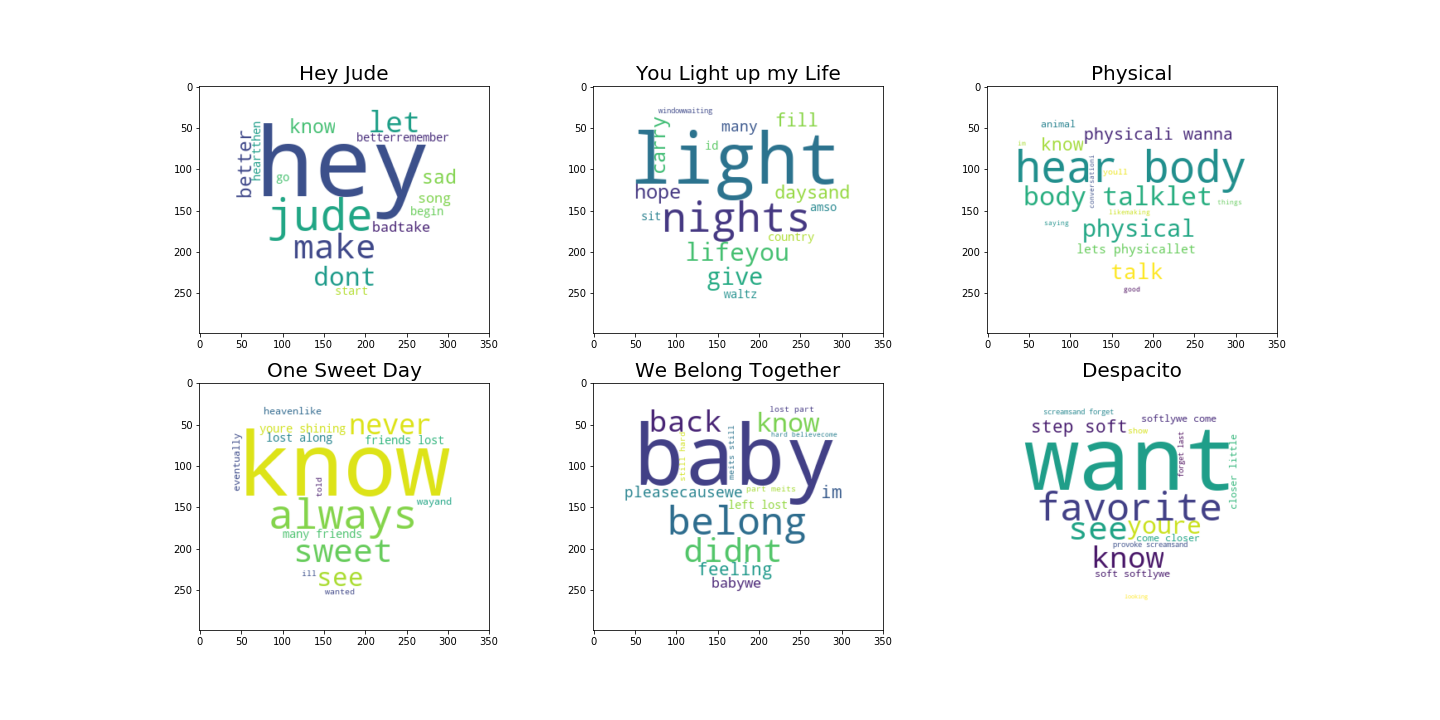

In [40]:
from IPython.display import Image
Image("lyrics.png")
# I scrape the lyrics of songs separately, since the code is lengthy, I save it in another notebook called 'Lyrics'
